In [53]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=10)

np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, formatter=dict(float=lambda x: f'{x:.2f}'))

In [13]:
from sklearn.datasets import load_wine

In [14]:
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [18]:
target_map = { num:wines['target_names'][num] for num in range(len(wines['target_names']))}

In [20]:
df_raw = pd.DataFrame(data = np.c_[wines['data'], wines['target']], columns = wines['feature_names'] + ['target'])
df_raw['target_names'] = df_raw['target'].map(target_map)

In [23]:
df = df_raw.copy()

In [37]:
corr = df.corr()

In [27]:
len(df.target)

178

In [31]:
df.target.value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

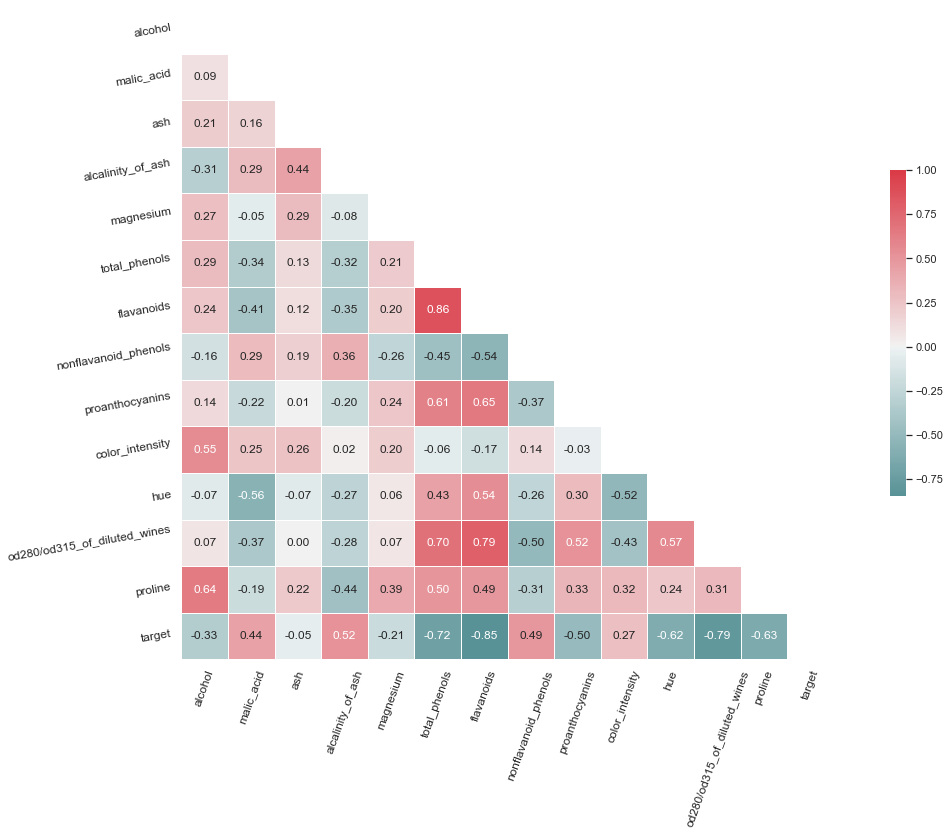

In [62]:
sns.set(style="white", )
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,12))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0, fmt='0.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=10)
plt.xticks(rotation=70)
ax.tick_params(axis='both', which='major', labelsize=12);